In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD

In [16]:
X = np.random.random((5,8))

In [33]:
X.round(2)

array([[0.52, 0.84, 0.56, 0.8 , 0.04, 0.82, 0.81, 0.44],
       [0.53, 0.31, 0.68, 0.96, 0.35, 0.37, 0.5 , 0.83],
       [0.82, 0.13, 0.74, 0.71, 0.79, 0.77, 0.66, 0.09],
       [0.31, 0.76, 0.99, 0.32, 0.84, 0.24, 0.76, 0.28],
       [0.23, 0.96, 0.71, 0.41, 0.86, 0.7 , 0.27, 0.63]])

In [34]:
X.mean(0)

array([0.48307044, 0.60100222, 0.73521494, 0.64039003, 0.57467101,
       0.57882275, 0.60171873, 0.45548139])

In [35]:
X_centered = X-X.mean(0)

In [36]:
X_centered

array([[ 0.03851751,  0.23687361, -0.17773787,  0.15781519, -0.53334744,
         0.23643123,  0.21132928, -0.01459635],
       [ 0.04865618, -0.29223044, -0.05077625,  0.32433718, -0.22326494,
        -0.21230864, -0.09980359,  0.37639869],
       [ 0.33533211, -0.47052015,  0.00407371,  0.07384078,  0.21154261,
         0.1930789 ,  0.0581427 , -0.36170175],
       [-0.17286721,  0.16278416,  0.25210156, -0.32241747,  0.26189434,
        -0.33543506,  0.15900322, -0.17492547],
       [-0.2496386 ,  0.36309282, -0.02766115, -0.23357567,  0.28317543,
         0.11823357, -0.32867161,  0.17482488]])

In [37]:
n_components = 4

## Scikit PCA and Truncated SVD on centered data are the same! 

In [25]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
svd = TruncatedSVD(n_components = n_components)
svd.fit(X_centered)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=5,
       random_state=None, tol=0.0)

In [27]:
pca.components_

array([[-0.36152945,  0.45078934,  0.21243791, -0.5225733 ,  0.53998472,
        -0.17718015, -0.14976452, -0.04966888],
       [ 0.31347508, -0.58409646,  0.18683383, -0.08881795,  0.50784041,
        -0.04039575,  0.1038961 , -0.4974345 ],
       [-0.089861  , -0.40237719,  0.07750797,  0.1989039 ,  0.2263419 ,
        -0.46094329, -0.41313168,  0.59166729],
       [-0.09961505,  0.00214439,  0.29622392, -0.03507049, -0.30326561,
        -0.70262973,  0.55526634, -0.08434697]])

In [28]:
svd.components_

array([[-0.36152945,  0.45078934,  0.21243791, -0.5225733 ,  0.53998472,
        -0.17718015, -0.14976452, -0.04966888],
       [ 0.31347508, -0.58409646,  0.18683383, -0.08881795,  0.50784041,
        -0.04039575,  0.1038961 , -0.4974345 ],
       [-0.089861  , -0.40237719,  0.07750797,  0.1989039 ,  0.2263419 ,
        -0.46094329, -0.41313168,  0.59166729],
       [-0.09961505,  0.00214439,  0.29622392, -0.03507049, -0.30326561,
        -0.70262973,  0.55526634, -0.08434697]])

In [31]:
pca.singular_values_

array([0.99668229, 0.85832178, 0.64817029, 0.53838469])

In [32]:
svd.singular_values_

array([0.99668229, 0.85832178, 0.64817029, 0.53838469])

In [38]:
pca.explained_variance_ #formula for calculation used here : S2/(n-1) is calculated and variance = ratio of each diagonal element to sum of diagonal elements

array([0.2483439 , 0.18417907, 0.10503118, 0.07246452])

In [30]:
svd.explained_variance_ #U * S is calculated and variance = ratio of each diagonal element to sum of diagonal elements is calculated

array([0.19867512, 0.14734326, 0.08402495, 0.05797162])

In [17]:
pca.transform(X)

array([[ 0.42218464, -0.38080813,  0.32048836, -0.2770186 ],
       [ 0.23451332, -0.41150468, -0.2192107 ,  0.37171938],
       [-0.66297579,  0.25188033,  0.34643916,  0.21435872],
       [-0.68560823, -0.03655009, -0.3307109 , -0.28002182],
       [ 0.69188606,  0.57698257, -0.11700593, -0.02903768]])

In [18]:
svd.transform(X_centered)

array([[ 0.42218464, -0.38080813,  0.32048836, -0.2770186 ],
       [ 0.23451332, -0.41150468, -0.2192107 ,  0.37171938],
       [-0.66297579,  0.25188033,  0.34643916,  0.21435872],
       [-0.68560823, -0.03655009, -0.3307109 , -0.28002182],
       [ 0.69188606,  0.57698257, -0.11700593, -0.02903768]])

## Randomized SVD

In [20]:
#Randomized SVD
U, s, V_ = randomized_svd(X_centered, n_components=5)

In [21]:
U.shape

(5, 5)

In [22]:
V_.shape

(5, 8)

In [23]:
s.shape

(5,)

In [24]:
s

array([1.27339634e+00, 8.43824288e-01, 6.27571750e-01, 5.83197801e-01,
       1.05507702e-16])

In [25]:
U.dot(np.diag(s)).dot(V_) # U * s * transpose(V) => original matrix

array([[ 0.15889351, -0.41746728,  0.14936042, -0.05678931,  0.01556716,
         0.33143695,  0.36559135,  0.18411231],
       [ 0.34327254, -0.20374812,  0.28932752,  0.20206411,  0.26268624,
         0.01447923, -0.20386305, -0.12608624],
       [-0.49841799,  0.17696703, -0.18324687,  0.29861876, -0.16807554,
        -0.37152576, -0.14456687,  0.28156632],
       [ 0.25436512,  0.37795323, -0.33885693, -0.03377734, -0.34670148,
        -0.29710248, -0.23023144,  0.27236551],
       [-0.25811318,  0.06629514,  0.08341586, -0.41011622,  0.23652362,
         0.32271206,  0.21307001, -0.6119579 ]])

In [26]:
X_centered

array([[ 0.15889351, -0.41746728,  0.14936042, -0.05678931,  0.01556716,
         0.33143695,  0.36559135,  0.18411231],
       [ 0.34327254, -0.20374812,  0.28932752,  0.20206411,  0.26268624,
         0.01447923, -0.20386305, -0.12608624],
       [-0.49841799,  0.17696703, -0.18324687,  0.29861876, -0.16807554,
        -0.37152576, -0.14456687,  0.28156632],
       [ 0.25436512,  0.37795323, -0.33885693, -0.03377734, -0.34670148,
        -0.29710248, -0.23023144,  0.27236551],
       [-0.25811318,  0.06629514,  0.08341586, -0.41011622,  0.23652362,
         0.32271206,  0.21307001, -0.6119579 ]])

In [27]:
#X_centered in reduced dimension:
# First select k columns of U, and k*k diag matrix of s, and the corresponding principal axes of V_ [rows]
X_ = U[0:5,0:3].dot(np.diag(s[0:3])).dot(V_[0:3,])

In [28]:
X_.shape

(5, 8)

In [29]:
X.shape

(5, 8)

In [30]:
#X and X_ are of same shape, but X_ is of lower rank k=3

In [31]:
X_

array([[ 0.08804371, -0.44183365,  0.24657407,  0.08673858,  0.13571884,
         0.25630384,  0.24361422,  0.10591183],
       [ 0.43834285, -0.17105193,  0.15888069,  0.00947018,  0.10145986,
         0.11529713, -0.04018718, -0.02115237],
       [-0.44359398,  0.19582188, -0.2584714 ,  0.18755599, -0.26104966,
        -0.31338729, -0.05018022,  0.34207834],
       [ 0.18274722,  0.35332269, -0.24058937,  0.11130656, -0.22524721,
        -0.37305012, -0.35353094,  0.19331725],
       [-0.26553981,  0.063741  ,  0.09360601, -0.39507132,  0.24911818,
         0.31483645,  0.20028411, -0.62015504]])

In [32]:
X

array([[0.69009567, 0.19523446, 0.54408487, 0.49953622, 0.72138941,
        0.79678388, 0.82126225, 0.85704056],
       [0.8744747 , 0.40895362, 0.68405196, 0.75838964, 0.96850848,
        0.47982617, 0.25180786, 0.54684202],
       [0.03278417, 0.78966877, 0.21147758, 0.8549443 , 0.5377467 ,
        0.09382118, 0.31110403, 0.95449458],
       [0.78556729, 0.99065497, 0.05586751, 0.52254819, 0.35912077,
        0.16824446, 0.22543947, 0.94529377],
       [0.27308898, 0.67899688, 0.47814031, 0.14620931, 0.94234587,
        0.788059  , 0.66874092, 0.06097036]])

In [35]:
X_centered.shape #8 dimensions

(5, 8)

In [36]:
pca = PCA()
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Explained variance')

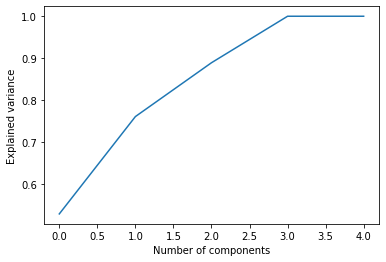

In [39]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [40]:
#ideal number of components = 3
pca_ = PCA(n_components=3)
pca_.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca_.transform(X_centered) #5X3 shape, as we chose 3 principal dimensions to use to represent the original matrix

array([[ 0.42218464, -0.38080813,  0.32048836],
       [ 0.23451332, -0.41150468, -0.2192107 ],
       [-0.66297579,  0.25188033,  0.34643916],
       [-0.68560823, -0.03655009, -0.3307109 ],
       [ 0.69188606,  0.57698257, -0.11700593]])

In [45]:
X_centered

array([[ 0.15889351, -0.41746728,  0.14936042, -0.05678931,  0.01556716,
         0.33143695,  0.36559135,  0.18411231],
       [ 0.34327254, -0.20374812,  0.28932752,  0.20206411,  0.26268624,
         0.01447923, -0.20386305, -0.12608624],
       [-0.49841799,  0.17696703, -0.18324687,  0.29861876, -0.16807554,
        -0.37152576, -0.14456687,  0.28156632],
       [ 0.25436512,  0.37795323, -0.33885693, -0.03377734, -0.34670148,
        -0.29710248, -0.23023144,  0.27236551],
       [-0.25811318,  0.06629514,  0.08341586, -0.41011622,  0.23652362,
         0.32271206,  0.21307001, -0.6119579 ]])

# CALCULATING EXPLAINED VARIANCE USING PCA AND SVD

## SVD on X when centered

In [40]:
U, s, V_ = randomized_svd(X_centered, n_components=5)

In [42]:
pc = U.dot(np.diag(s))

In [43]:
pc.shape

(5, 5)

In [44]:
pc

array([[-3.88188416e-01, -4.24696212e-01, -4.06803072e-01,
         5.26836773e-02,  5.10296656e-17],
       [-4.16292804e-01, -1.54759903e-01,  4.85053794e-01,
         9.78279299e-02,  5.10296656e-17],
       [-2.81782072e-01,  6.59744186e-01, -1.04948901e-01,
        -1.72819448e-01,  5.10296656e-17],
       [ 5.43647330e-01,  1.76550804e-01, -4.98495671e-02,
         3.62861770e-01,  5.10296656e-17],
       [ 5.42615962e-01, -2.56838875e-01,  7.65477463e-02,
        -3.40553930e-01,  5.10296656e-17]])

In [50]:
diag_sum = np.diag(pc).sum()
diag_mean = diag_sum/pc.shape[0]
var = (np.diag(pc) - diag_mean) ** 2
var = np.mean(var)

In [67]:
exp_var = np.var(pc, axis=0)

In [77]:
exp_var #Same as svd.explained_variance above

array([1.98675117e-01, 1.47343257e-01, 8.40249463e-02, 5.79716158e-02,
       8.35609962e-65])

In [68]:
full_var = np.var(X, axis=0).sum()

In [69]:
exp_var/full_var #explained_variance ratio in SVD(X_centered)

array([4.07108681e-01, 3.01923663e-01, 1.72176997e-01, 1.18790659e-01,
       1.71226309e-64])

## PCA on X

In [72]:
cov_X = np.cov(X)

In [97]:
U1, s1, v1_ = randomized_svd(X_centered, n_components=5)

In [98]:
exp_var = s1**2/(X_centered.shape[0]-1)

In [99]:
exp_var

array([2.48343896e-01, 1.84179071e-01, 1.05031183e-01, 7.24645197e-02,
       3.25503346e-33])

In [100]:
PCA(n_components=5).fit(X).explained_variance_ #exp variance in PCA(X) is calculated by centering X, doing SVD(X centered), and then S2/n-1

array([2.48343896e-01, 1.84179071e-01, 1.05031183e-01, 7.24645197e-02,
       1.47322672e-32])

In [83]:
exp_var/exp_var.sum()  #explained variance ratio in PCA 

array([0.52934446, 0.29275163, 0.10885039, 0.05740668, 0.01164684])

## KERNEL PCA

In [46]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

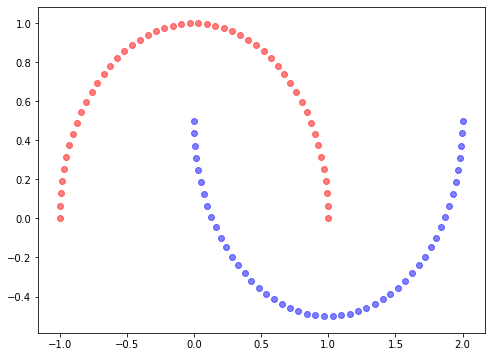

In [47]:
plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

In [49]:
_pca1 = PCA(n_components =2)
X1 = _pca1.fit_transform(X)

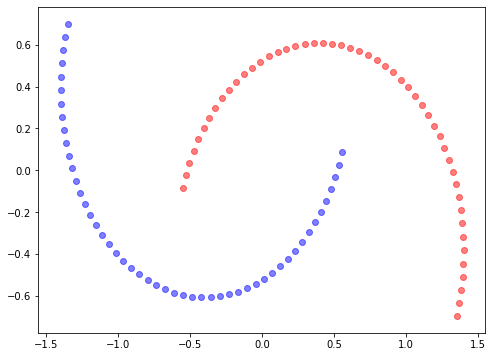

In [50]:
plt.figure(figsize=(8,6))

plt.scatter(X1[y==0, 0], X1[y==0, 1], color='red', alpha=0.5)
plt.scatter(X1[y==1, 0], X1[y==1, 1], color='blue', alpha=0.5)

In [53]:
_pca2 = PCA(n_components=1)
X2 = _pca2.fit_transform(X)

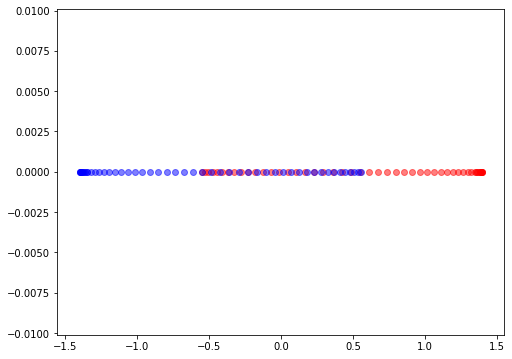

In [54]:
plt.figure(figsize=(8,6))

plt.scatter(X2[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X2[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

In [55]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

In [56]:
X3 = stepwise_kpca(X,gamma=15,n_components=2)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

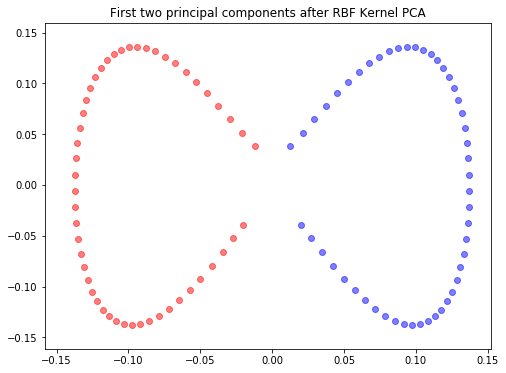

In [60]:
plt.figure(figsize=(8,6))

plt.scatter(X3[y==0, 0], X3[y==0,1], color='red', alpha=0.5)
plt.scatter(X3[y==1, 0], X3[y==1,1], color='blue', alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

Text(0.5, 1.0, 'Only first principal component after RBF Kernel PCA')

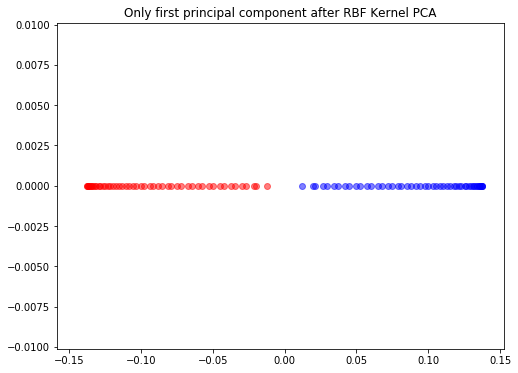

In [59]:
plt.figure(figsize=(8,6))

plt.scatter(X3[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X3[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title('Only first principal component after RBF Kernel PCA')

### Using Scikit learn Kernel PCA

In [61]:
from sklearn.decomposition import KernelPCA

In [68]:
_pca3 = KernelPCA(n_components=2) #linear Kernel, as default kernel is 'linear'
X4 = _pca3.fit_transform(X)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

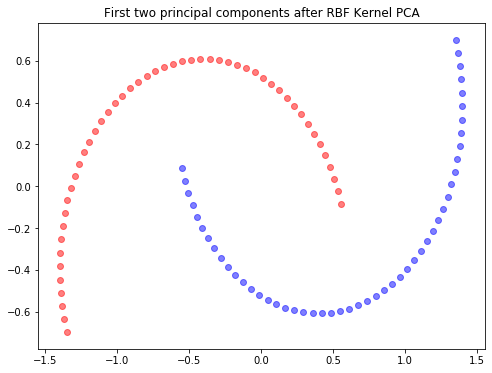

In [69]:
plt.figure(figsize=(8,6))

plt.scatter(X4[y==0, 0], X4[y==0,1], color='red', alpha=0.5)
plt.scatter(X4[y==1, 0], X4[y==1,1], color='blue', alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

In [70]:
_pca4 = KernelPCA(kernel='rbf', n_components=2, gamma=15)
X5= _pca4.fit_transform(X)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

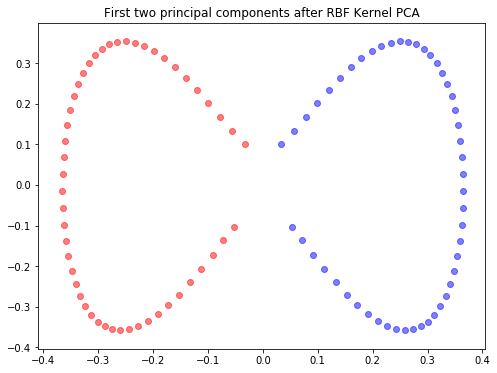

In [71]:
plt.figure(figsize=(8,6))

plt.scatter(X5[y==0, 0], X5[y==0,1], color='red', alpha=0.5)
plt.scatter(X5[y==1, 0], X5[y==1,1], color='blue', alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA') #Similar to the output from Kernel PCA 

In [72]:
_pca5 = KernelPCA(kernel='rbf', n_components=1, gamma=15)
X6 = _pca5.fit_transform(X)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

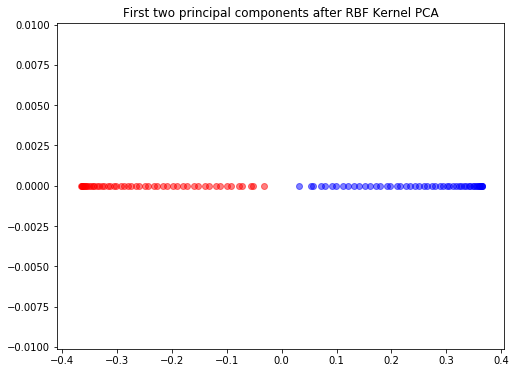

In [74]:
plt.figure(figsize=(8,6))

plt.scatter(X6[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X6[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

In [75]:
# In cases of non-linear data like :
#Moons
#Concentric circles
#Swiss roll
#Kernel PCA is able to clearly separate the classes in the first principal component, unlike linear PCA.

In [77]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, y = make_swiss_roll(n_samples=800, random_state=123)

In [78]:
_pca_1 = PCA(n_components = 2)
_X_1 = _pca_1.fit_transform(X)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

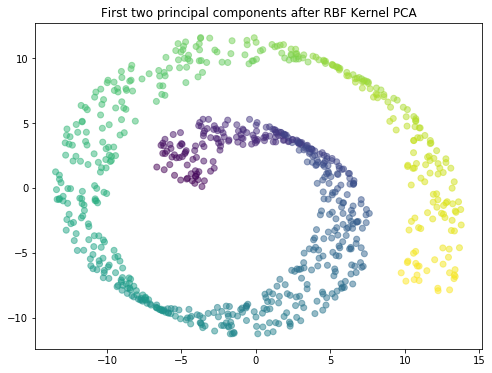

In [80]:
plt.figure(figsize=(8,6))

plt.scatter(_X_1[:,0], _X_1[:,1], c=y, alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

In [84]:
_pca_2 = PCA(n_components = 1)
_X_11 = _pca_2.fit_transform(X)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

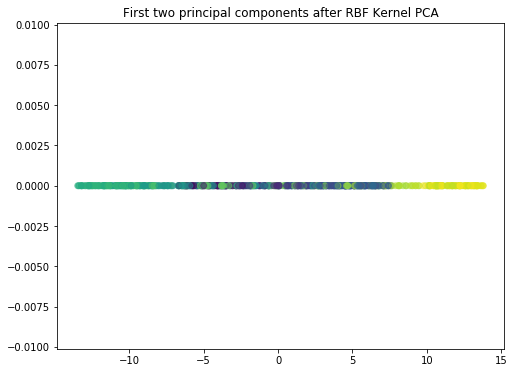

In [86]:
plt.figure(figsize=(8,6))

plt.scatter(_X_11[:, 0], np.zeros((800,1)), c=y, alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

In [87]:
_X_2 = stepwise_kpca(X, gamma = 0.1,n_components=2)

Text(0.5, 1.0, 'First two principal components after RBF Kernel PCA')

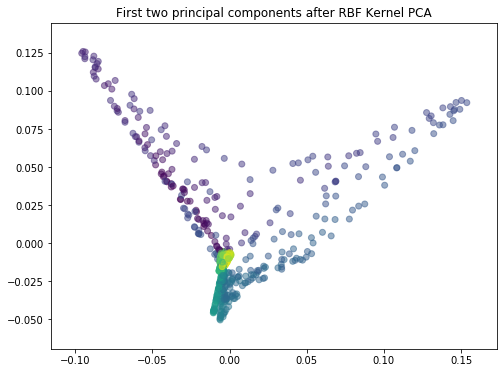

In [88]:
plt.figure(figsize=(8,6))

plt.scatter(_X_2[:, 0], _X_2[:,1], c=y, alpha=0.5)
plt.title('First two principal components after RBF Kernel PCA')

Text(0.5, 1.0, 'First principal component after RBF Kernel PCA')

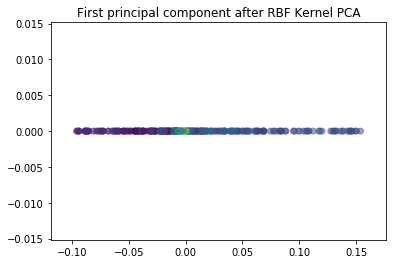

In [91]:
plt.scatter(_X_2[:, 0], np.zeros((800,1)), c=y, alpha=0.5)
plt.title('First principal component after RBF Kernel PCA')